# Chapter 9: Support Vector Machines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set_style('white')
from sklearn.preprocessing import scale

## Support Vector Classifier

In [2]:
# Function to plot a classifier with support vectors
def plot_svc(svc, X, y, h=0.02, pad=0.25):
  x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
  y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
  
  # Data points
  plt.scatter(X[:, 0], X[:, 1], s=70, c=y, cmap=plt.cm.Paired)
  
  # Support vectors indicated in plot by vertical lines
  sv = svc.support_vectors_
  plt.scatter(sv[:, 0], sv[:, 1], c='k', marker='|', s=100, linewidth=1)
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.show()
  print('Number of support vectors: {}'.format(svc.support_.size))

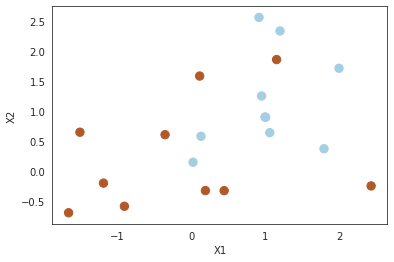

In [3]:
# Generating random data: 20 observations of 2 features and divide into 2 classes
np.random.seed(5)
X = np.random.randn(20, 2)
y = np.repeat([1, -1], 10)

X[y == -1] = X[y == -1] + 1
plt.scatter(X[:, 0], X[:, 1], s=70, c=y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [4]:
from sklearn.svm import SVC

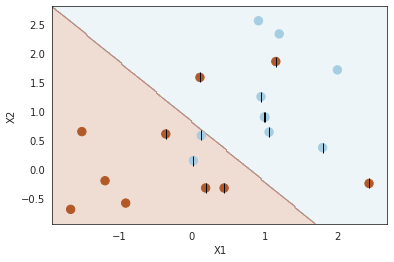

Number of support vectors: 13


In [5]:
svc = SVC(C=1.0, kernel='linear')
svc.fit(X, y)

plot_svc(svc, X, y)

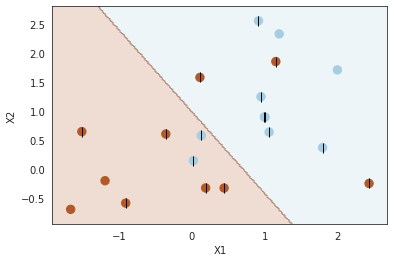

Number of support vectors: 16


In [6]:
# When using a smaller cost parameter (C=0.1), the margin is wider, resulting in more support vectors.
svc_2 = SVC(C=0.1, kernel='linear')
svc_2.fit(X, y)

plot_svc(svc_2, X, y)

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
# Select the optimal C parameter by cross-validation
tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X, y)
clf.cv_results_

{'mean_fit_time': array([0.0002851 , 0.00025516, 0.00026784, 0.00026057, 0.00038846,
        0.00028672, 0.00038702]),
 'std_fit_time': array([4.09527617e-05, 2.14523733e-06, 2.51881528e-05, 2.17065681e-06,
        1.39881505e-04, 2.51682855e-05, 4.43057230e-05]),
 'mean_score_time': array([0.00018725, 0.00018044, 0.00017276, 0.000179  , 0.00022678,
        0.00018325, 0.00018027]),
 'std_score_time': array([2.58255199e-05, 2.37900170e-05, 1.10909494e-06, 1.50142385e-05,
        7.41918472e-05, 2.24283844e-05, 2.39951451e-06]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 5, 10, 100],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 5},
  {'C': 10},
  {'C': 100}],
 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]),
 'split1_test_score': array([0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ]),
 'split2_test_score': array([0.5, 0.5, 0

In [9]:
clf.best_params_

{'C': 0.001}

## Support Vector Machine

In [10]:
from sklearn.model_selection import train_test_split

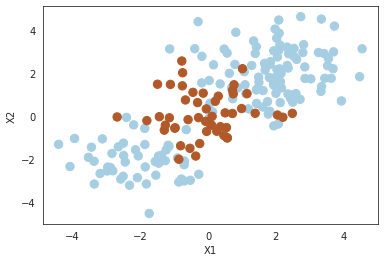

In [11]:
# Generating the dataset
np.random.seed(8)
X = np.random.randn(200, 2)
X[:100] += 2
X[101: 150] -= 2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1, 50)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

plt.scatter(X[:, 0], X[:, 1], c=y, s=70, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2');

In [12]:
svm = SVC(C=1.0, kernel='rbf', gamma=1)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

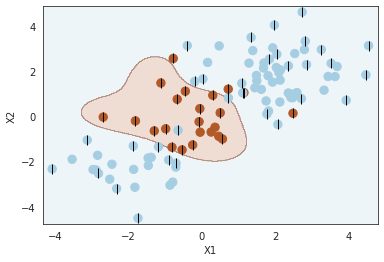

Number of support vectors: 51


In [13]:
plot_svc(svm, X_train, y_train)

In [14]:
# Increasing C parameter, allowing more flexibility
svm_2 = SVC(C=100, kernel='rbf', gamma=1.)
svm_2.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

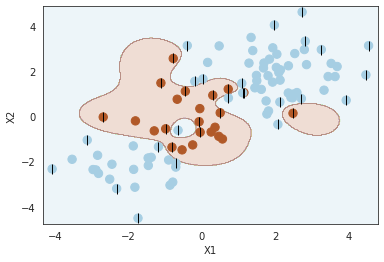

Number of support vectors: 36


In [15]:
plot_svc(svm_2, X_train, y_train)

In [16]:
# Set the parameters by cross-validation
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100],
                     'gamma': [0.5, 1, 2, 3, 4]}]

clf = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy', return_train_score=True)
clf.fit(X_train, y_train)
clf.cv_results_

/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'mean_fit_time': array([0.00043912, 0.00041084, 0.00040002, 0.00041044, 0.00041335,
        0.0003659 , 0.00039644, 0.00043492, 0.00045094, 0.00046766,
        0.00034308, 0.00037291, 0.00043976, 0.00045557, 0.00046465,
        0.00035071, 0.00037589, 0.00048954, 0.00049713, 0.00049338,
        0.000383  , 0.00042186, 0.0004674 , 0.00048044, 0.00049143]),
 'std_fit_time': array([9.83294297e-05, 4.15462828e-05, 6.97373325e-06, 1.11976808e-05,
        6.17504120e-06, 5.70817100e-06, 7.12532582e-06, 8.23410932e-06,
        1.33297949e-05, 1.83446791e-05, 8.24045801e-06, 1.26044081e-05,
        1.72514419e-05, 1.53959340e-05, 2.35166906e-05, 2.65564480e-05,
        1.05364828e-05, 6.24196096e-05, 2.44684029e-05, 1.64239774e-05,
        1.83344352e-05, 2.58008563e-05, 1.84475596e-05, 1.43892872e-05,
        3.05512362e-05]),
 'mean_score_time': array([0.00024271, 0.00021503, 0.00020237, 0.00020835, 0.0002027 ,
        0.00019867, 0.00020192, 0.00020518, 0.00020456, 0.00020304,
        0.00

In [17]:
clf.best_params_

{'C': 1, 'gamma': 0.5}

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
# Confusion matrix
confusion_matrix(y_test, clf.best_estimator_.predict(X_test))

array([[67,  6],
       [ 9, 18]])

In [20]:
# Accuracy
clf.best_estimator_.score(X_test, y_test)

0.85

## ROC Curves

In [21]:
svm_3 = SVC(C=1, kernel='rbf', gamma=2)
svm_3.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [22]:
# More flexible model
svm_4 = SVC(C=1, kernel='rbf', gamma=50)
svm_4.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
from sklearn.metrics import roc_curve, auc

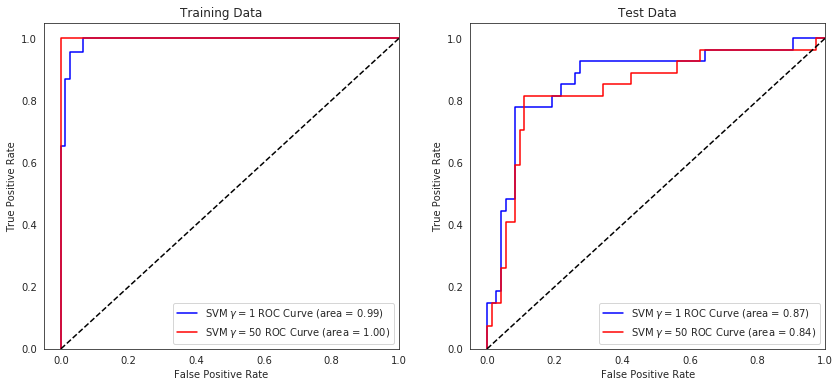

In [24]:
y_train_score_3 = svm_3.decision_function(X_train)
y_train_score_4 = svm_4.decision_function(X_train)

false_pos_rate_3, true_pos_rate_3, _ = roc_curve(y_train, y_train_score_3)
roc_auc_3 = auc(false_pos_rate_3, true_pos_rate_3)

false_pos_rate_4, true_pos_rate_4, _ = roc_curve(y_train, y_train_score_4)
roc_auc_4 = auc(false_pos_rate_4, true_pos_rate_4)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.plot(false_pos_rate_3, true_pos_rate_3, label='SVM $\gamma=1$ ROC Curve (area = {:.2f})'.format(roc_auc_3), color='b')
ax1.plot(false_pos_rate_4, true_pos_rate_4, label='SVM $\gamma=50$ ROC Curve (area = {:.2f})'.format(roc_auc_4), color='r')
ax1.set_title('Training Data')

y_test_score_3 = svm_3.decision_function(X_test)
y_test_score_4 = svm_4.decision_function(X_test)

false_pos_rate_3, true_pos_rate_3, _ = roc_curve(y_test, y_test_score_3)
roc_auc_3 = auc(false_pos_rate_3, true_pos_rate_3)

false_pos_rate_4, true_pos_rate_4, _ = roc_curve(y_test, y_test_score_4)
roc_auc_4 = auc(false_pos_rate_4, true_pos_rate_4)

ax2.plot(false_pos_rate_3, true_pos_rate_3, label='SVM $\gamma=1$ ROC Curve (area = {:.2f})'.format(roc_auc_3), color='b')
ax2.plot(false_pos_rate_4, true_pos_rate_4, label='SVM $\gamma=50$ ROC Curve (area = {:.2f})'.format(roc_auc_4), color='r')
ax2.set_title('Test Data')

for ax in fig.axes:
  ax.legend()
  ax.set_xlabel('False Positive Rate')
  ax.set_ylabel('True Positive Rate')
  ax.plot([0, 1], [0, 1], 'k--')
  ax.set_xlim([-0.05, 1.0])
  ax.set_ylim([0.0, 1.05])

The more flexible model perform better on the training data but worse on the test data.

## SVM with Multiple Classes

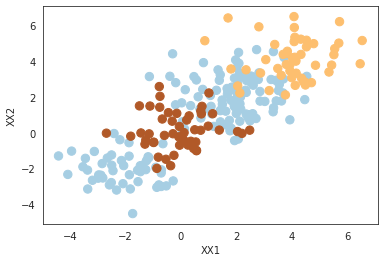

In [25]:
# Adding a third class of observations
np.random.seed(8)
XX = np.vstack([X, np.random.randn(50, 2)])
yy = np.hstack([y, np.repeat(0, 50)])
XX[yy == 0] += 4

plt.scatter(XX[:, 0], XX[:, 1], c=yy, s=70, cmap=plt.cm.Paired)
plt.xlabel('XX1')
plt.ylabel('XX2');

In [26]:
svm_5 = SVC(C=1, kernel='rbf')
svm_5.fit(XX, yy)

/home/kienmn/Workspace/JupyterWorkspace/jupyter_env/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

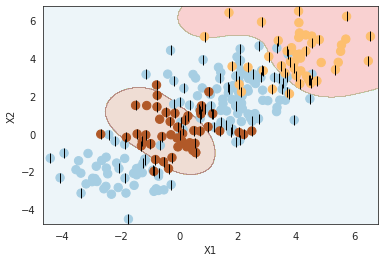

Number of support vectors: 133


In [27]:
plot_svc(svm_5, XX, yy)

## Application to Gene Expression Data

In [28]:
X_train = pd.read_csv('data/Khan_xtrain.csv', index_col=0)
y_train = pd.read_csv('data/Khan_ytrain.csv', index_col=0).values.ravel()
X_test = pd.read_csv('data/Khan_xtest.csv', index_col=0)
y_test = pd.read_csv('data/Khan_ytest.csv', index_col=0).values.ravel()

In [29]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V2299,V2300,V2301,V2302,V2303,V2304,V2305,V2306,V2307,V2308
V1,0.773344,-2.438405,-0.482562,-2.721135,-1.217058,0.827809,1.342604,0.057042,0.133569,0.565427,...,-0.238511,-0.027474,-1.660205,0.588231,-0.463624,-3.952845,-5.496768,-1.414282,-0.647600,-1.763172
V2,-0.078178,-2.415754,0.412772,-2.825146,-0.626236,0.054488,1.429498,-0.120249,0.456792,0.159053,...,-0.657394,-0.246284,-0.836325,-0.571284,0.034788,-2.478130,-3.661264,-1.093923,-1.209320,-0.824395
V3,-0.084469,-1.649739,-0.241307,-2.875286,-0.889405,-0.027474,1.159300,0.015676,0.191942,0.496585,...,-0.696352,0.024985,-1.059872,-0.403767,-0.678653,-2.939352,-2.736450,-1.965399,-0.805868,-1.139434
V4,0.965614,-2.380547,0.625297,-1.741256,-0.845366,0.949687,1.093801,0.819736,-0.284620,0.994732,...,0.259746,0.357115,-1.893128,0.255107,0.163309,-1.021929,-2.077843,-1.127629,0.331531,-2.179483
V5,0.075664,-1.728785,0.852626,0.272695,-1.841370,0.327936,1.251219,0.771450,0.030917,0.278313,...,-0.200404,0.061753,-2.273998,-0.039365,0.368801,-2.566551,-1.675044,-1.082050,-0.965218,-1.836966


In [30]:
# Count the instance for each classes
pd.Series(y_train).value_counts(sort=False)

1     8
2    23
3    12
4    20
dtype: int64

In [31]:
# Count the instance for each classes
pd.Series(y_test).value_counts(sort=False)

1    3
2    6
3    6
4    5
dtype: int64

In [32]:
# This model is based on libsvm library
svc = SVC(kernel='linear')

# This model is based on liblinear library
# from sklearn.svm import LinearSVC
# svc = LinearSVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [33]:
cm = confusion_matrix(y_train, svc.predict(X_train))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
cm_df

True,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


In [34]:
cm = confusion_matrix(y_test, svc.predict(X_test))
cm_df = pd.DataFrame(cm.T, index=svc.classes_, columns=svc.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
cm_df

True,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5
